In [1]:
import os
# from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend

from ipyparallel import Client
from ipyparallel.joblib import IPythonParallelBackend
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras import backend as K
import ipyparallel as ipp
import os
print('CONFIGURING GPU USAGE USING TENSORFLOW')
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True 

K.tensorflow_backend.set_session(tf.Session(config=config))
print('GPU INITIALIZED:',config.IsInitialized())
print('GPU CONFIGURATION:',config)
print('CONFIGURING CPU USAGE USING IPY-PARALLEL')

from keras.applications import InceptionResNetV2
import keras   
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras import Sequential,activations,metrics
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Dense, Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation
import matplotlib.pyplot as plt
import glob 
from keras.regularizers import l1,l2
from keras.optimizers import SGD
from subprocess import check_output
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as k
from keras.models import Model
import ipyparallel as ipp
import cv2
# with rc[:2].sync_imports():    
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import glob
from keras.utils import np_utils
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
      
from sklearn.metrics import make_scorer
    
config = tf.ConfigProto(intra_op_parallelism_threads=4,\
        inter_op_parallelism_threads=4, allow_soft_placement=True,\
        device_count = {'CPU' : 3, 'GPU' : 1})
session = tf.Session(config=config)
K.set_session(session)
print(config)



C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

CONFIGURING GPU USAGE USING TENSORFLOW
GPU INITIALIZED: True
GPU CONFIGURATION: gpu_options {
  per_process_gpu_memory_fraction: 0.9
  allow_growth: true
}

CONFIGURING CPU USAGE USING IPY-PARALLEL
device_count {
  key: "CPU"
  value: 3
}
device_count {
  key: "GPU"
  value: 1
}
intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
allow_soft_placement: true



## IMPORTING DATASETS / RESCALING DATA

[[[156. 145. 159.]
  [143. 132. 146.]
  [139. 128. 142.]
  ...
  [152. 138. 171.]
  [152. 138. 171.]
  [152. 138. 171.]]

 [[145. 134. 148.]
  [156. 145. 159.]
  [152. 141. 155.]
  ...
  [156. 142. 175.]
  [154. 140. 173.]
  [154. 140. 173.]]

 [[149. 138. 152.]
  [153. 142. 156.]
  [162. 151. 165.]
  ...
  [152. 141. 171.]
  [151. 140. 170.]
  [152. 141. 171.]]

 ...

 [[144. 143. 161.]
  [142. 141. 159.]
  [144. 143. 161.]
  ...
  [137. 139. 136.]
  [124. 126. 123.]
  [122. 124. 121.]]

 [[142. 140. 161.]
  [140. 138. 159.]
  [139. 137. 158.]
  ...
  [139. 141. 138.]
  [121. 123. 120.]
  [134. 136. 133.]]

 [[141. 139. 160.]
  [140. 138. 159.]
  [133. 131. 152.]
  ...
  [132. 134. 131.]
  [123. 125. 122.]
  [129. 131. 128.]]]
(1, 3000, 4000, 3)


MemoryError: Unable to allocate 34.3 GiB for an array with shape (36000000, 256) and data type float32

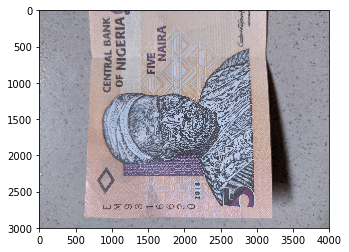

In [2]:
img = load_img('Naira_Model_Dataset/validation/validation/Five_naira/IMG_20200727_133838.jpg')
plt.imshow(img)
x = img_to_array(img)
print(x)
x = x.reshape((1,) + x.shape)
print(x.shape)
y = keras.utils.to_categorical(x)
display(y.shape)

In [ ]:
# print('<OPTIONIAL--BASIC EDGE DETECTOR USING OPEN-CV>')

# # Read the image
# # image = cv2.imread('340px-DNA_Structure+Key+Labelled.pn_NoBB.png')
# image= cv2.imread('Naira_Model_Dataset/train/train/Fifty_naira/IMG_20200723_135445.jpg')

# # convert to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # blur it
# blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# # Show both our images
# cv2.imshow("Original image", image)
# cv2.imshow("Blurred image", blurred_image) 

# # Run the Canny edge detector
# canny = cv2.Canny(blurred_image, 50, 8)
# cv2.imshow("Canny", canny)



# im, contours, hierarchy= cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print("Number of objects found = ", len(contours))
# print('press "esc" to exit to properly exit out the image window ')


# cv2.drawContours(image, contours, -1, (0,255,0), 200) #255,0,255... 255,255,255.... etc .  <(^^)>
# cv2.imshow("objects Found", image)
# cv2.waitKey()

In [3]:
# i = 0
# for batch in train_gen.flow_from_directory('Naira_Model_Dataset/train/train', batch_size=1,
#                                   save_to_dir='Naira_Model_Dataset/test/test/augmented_test/', save_prefix='IMG', save_format='jpg',):
#     i += 1
#     if i > 2000:
#         break

In [4]:
from keras.preprocessing import image
img_paths = glob.glob("Naira_Model_Dataset/test/test/Fifty_naira/*.jpg")

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(255, 255))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

img_input = paths_to_tensor(img_paths)



print('image shape: #images->{}, Height->{}, Width->{}, #Channels->{}'\
      .format(img_input.shape[0],img_input.shape[1],img_input.shape[2],img_input.shape[3]))

image shape: #images->37, Height->255, Width->255, #Channels->3


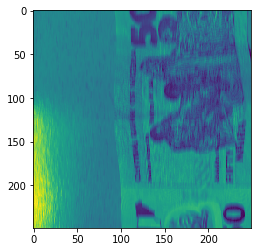

In [5]:
data = np.array([img_input], dtype=np.float32)
filters = np.zeros(shape=(7,7,3,9), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1


X1=tf.placeholder(tf.float32, shape=(37,255,255,3),name='X')

conv1=tf.nn.conv2d(X1,filters,strides=[1,1,1,1], padding='VALID')
relu = tf.nn.relu(conv1)

with tf.Session() as sess:
    output = sess.run(relu, feed_dict={X1:img_input})
plt.imshow(output[5,:,:,0])
plt.show()


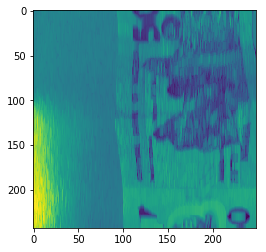

In [6]:
max_pool = tf.nn.max_pool(relu,ksize=[1,7,1,1],strides=[1,1,1,1],padding='VALID')
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X1:img_input})
plt.imshow(output[5,:,:,0])
plt.show()


## RESIDUAL GLOBAL AVERAGE POOLING
### BASELINE MODEL

In [7]:
batch_size = 7
train_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=3,
                                                        width_shift_range=0.0025,
                                                        height_shift_range=0.025,
                                                        brightness_range=None,
                                                        shear_range=0.01,
                                                        zoom_range=0.025,
                                                        channel_shift_range=0.0,
                                                        fill_mode="nearest",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,
                                                        )

valid_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=45,
                                                        width_shift_range=0.005,
                                                        height_shift_range=0.015,
                                                        brightness_range=None,
                                                        shear_range=0.09,
                                                        zoom_range=0.145,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,)

test_gen = keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization=False,
                                                        rotation_range=90,
                                                        width_shift_range=0.0045,
                                                        height_shift_range=0.015,
                                                        brightness_range=None,
                                                        shear_range=0.02,
                                                        zoom_range=0.2400,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,)

train_generator = train_gen.flow_from_directory('Naira_Model_Dataset/train/train/', shuffle=True, 
        target_size=(255,255),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')


test_generator = test_gen.flow_from_directory('Naira_Model_Dataset/validation/validation/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = valid_gen.flow_from_directory('Naira_Model_Dataset/test/test/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

Found 265 images belonging to 8 classes.
Found 264 images belonging to 8 classes.
Found 264 images belonging to 8 classes.


In [8]:
ram = 264*255*255*32 
print('n_bits',ram)
print('RAM NEEDED FOR ONE INSTANCE: 33MB')


n_bits 549331200
RAM NEEDED FOR ONE INSTANCE: 33MB


In [9]:
batchXt, batchyt = train_generator.next() 
batchXv, batchyv = validation_generator.next() 
batchXte, batchyte = test_generator.next()
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(2, (4, 4), input_shape = (255, 255, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2 )))
classifier.add(Conv2D(2, (4, 4), activation = 'relu', padding='valid'))
classifier.add(MaxPooling2D(pool_size = (7, 7)))
classifier.add(GlobalAveragePooling2D())
# classifier.add(Dropout(0.3))
# Step 4 - Full connection
classifier.add(Dense(8, activation = 'softmax'))
classifier.summary()
callbacks = [tf.keras.callbacks.TensorBoard(log_dir="logs")]
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy','mean_squared_error'])
classifier.fit_generator(train_generator,
                         steps_per_epoch = 7,
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = 8,
                         callbacks=callbacks
                            )
loss = classifier.evaluate_generator(test_generator, steps=5)
pred = classifier.predict_generator(test_generator, steps=5)
# print(loss)
pd.DataFrame(pred)
print('saving model')
classifier.save('Currency_baseline.h5')
classifier.save_weights('Currency_baseline_weights.h5')
from datetime import date
print('converting to tflite')
converter = tf.lite.TFLiteConverter.from_keras_model_file('Currency_baseline.h5') # TF 1.x
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # TF 2.x
tflite_model = converter.convert() 
tflite_model_file_name = "Currency_baseline" + "_" + str(date.today()) + ".tflite"
open(tflite_model_file_name, "wb").write(tflite_model)

W0812 16:55:35.546853 18164 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 16:55:35.548855 18164 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 16:55:35.551856 18164 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 16:55:35.569854 18164 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 16:55:35.610854 18164 deprecation_wrapper.py:119] From C:\Users\p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 2)       98        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 2)       66        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 2)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 24        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________


W0812 16:55:35.832854 18164 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
2/7 [=======>......................] - ETA: 10s - loss: 2.1133 - categorical_accuracy: 0.0000e+00 - mean_squared_error: 0.1105

C:\Users\peace\Anaconda3_2\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.234454). Check your callbacks.
  % delta_t_median)


7/7 [==============================] - 23s 3s/step - loss: 2.0970 - categorical_accuracy: 0.0204 - mean_squared_error: 0.1099 - val_loss: 2.0812 - val_categorical_accuracy: 0.0357 - val_mean_squared_error: 0.1094
Epoch 2/5
7/7 [==============================] - 35s 5s/step - loss: 2.0772 - categorical_accuracy: 0.2245 - mean_squared_error: 0.1093 - val_loss: 2.0722 - val_categorical_accuracy: 0.3750 - val_mean_squared_error: 0.1091
Epoch 3/5
7/7 [==============================] - 46s 7s/step - loss: 2.0761 - categorical_accuracy: 0.2857 - mean_squared_error: 0.1093 - val_loss: 2.0762 - val_categorical_accuracy: 0.2143 - val_mean_squared_error: 0.1093
Epoch 4/5
7/7 [==============================] - 24s 3s/step - loss: 2.0762 - categorical_accuracy: 0.2245 - mean_squared_error: 0.1093 - val_loss: 2.0682 - val_categorical_accuracy: 0.4464 - val_mean_squared_error: 0.1090
Epoch 5/5
7/7 [==============================] - 23s 3s/step - loss: 2.0707 - categorical_accuracy: 0.3469 - mean_squa

W0812 16:58:30.907932 18164 deprecation.py:323] From C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\lite\python\util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W0812 16:58:30.908963 18164 deprecation.py:323] From C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


2840

In [10]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7
0,0.125042,0.129508,0.124134,0.125461,0.123174,0.125499,0.124386,0.122795
1,0.124756,0.129530,0.123881,0.126401,0.122530,0.125237,0.124462,0.123202
2,0.125627,0.128713,0.122864,0.126559,0.122761,0.125279,0.124677,0.123520
3,0.126031,0.128399,0.122546,0.126375,0.123014,0.125362,0.124738,0.123535
4,0.126000,0.128362,0.122426,0.126634,0.122854,0.125294,0.124770,0.123660
5,0.125008,0.129609,0.124338,0.125180,0.123324,0.125566,0.124336,0.122640
6,0.124741,0.129532,0.123870,0.126448,0.122498,0.125224,0.124465,0.123222
7,0.125966,0.128395,0.122468,0.126625,0.122847,0.125293,0.124761,0.123646
8,0.124365,0.129897,0.124337,0.126335,0.122422,0.125216,0.124365,0.123062
9,0.124849,0.129413,0.123701,0.126539,0.122486,0.125212,0.124503,0.123298
